Data Collection

In [ ]:
import tweepy as tw
import pandas as pd

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''


In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)
search_words = "#आईपीएल"
date_since = "2010-11-16"
new_search = search_words + " -filter:retweets"


In [ ]:
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
d=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#कांग्रेस"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
e=[tweet.full_text for tweet in tweets]


In [ ]:
search_words = "#कोरोना"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
f=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#बीजेपी"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
g=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#मोदी"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
h=[tweet.full_text for tweet in tweets]

In [ ]:
t=d+e+f+g+h


In [ ]:
tw=[]
for tweets in t:
  tw.append(tweets)


In [ ]:
tw

Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import itertools as it
import spacy
from spacy.lang.hi import Hindi
import regex as re
nlp_hi = Hindi()


In [ ]:
extended_stop_words = ['जी','श्री','|','l','श्रीमती']
for stopword in extended_stop_words:
    lexeme = nlp_hi.vocab[stopword]
    lexeme.is_stop = True

In [ ]:
def preprocessing_hi(text_hi):
  tweet_hi = []
  tokenized_text = nlp_hi(text_hi)
  for token in tokenized_text:
    if(token.text!='\n\n'
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and not token.like_email
        and not token.is_digit
        and not token.is_quote
        and (re.search(r'@\S+',token.text) is None)
        and not token.like_url):
      tweet_hi.append(token.text)


  tweet = ' '.join([token  for token in tweet_hi])
  return tweet

In [ ]:
df=pd.read_csv("tweetSet.csv")
x=df['Tweets'].tolist()

In [ ]:
len(x)

1001

In [ ]:
p=[]
for tweets in x:
  p.append(preprocessing_hi(tweets))

In [ ]:
! pip install demoji
import demoji
pt=[]
for tweet in p:
  tweet=tweet.replace('\\n','')
  tweet=tweet.replace('#','')
  tweet=demoji.replace(tweet,'')
  pt.append(tweet)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
pt

['देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGandhi Rafool NakliGandhi  CHAMCHAS देश सच्चा सटीक हिन्दुओं सूर्योदय सिर्फ सिर्फ बीजेपी YugpurushModiji',
 'हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इंतजाम लोगो कभी नही रखना पड़ता सरकार भरोसा बचा नही लोग इंतजाम खुद करेगे',
 'बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वोट काटने बीजेपी पाल रखी अपना वोट बाटने दे UP Goa Punjab and उत्तराखंड ध्यान रखे मोदी हराना वोट कटवाओ सावधानModiResign WhistlePodu',
 'आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्षण विरोधी हूं वोट कांग्रेस दूंगा,,मूर्खो तुम आरक्षण विरोधी पार्टियों गुलाम दल्ले',
 '   राहुल बीजेपी',
 'ModiResignOrRepeal बीजेपी मित्रो वक्त देश माफी मांग इस्तीफा दे खुद इज्जत बचालो',
 'मई पहला प्रश्नपत्रकार कांग्रेस सीट जीत क्यों मिला  चटवा हमारे राहुल कार्यक्रम रद्द जिससे लोगों मुख हंसी चली गई जनता गुस्से बीजेपी वोट देकर जीता दिया। ',
 'उत्सव सुने बीजेपी कार्यकाल उत्सव नाम जुड़ गाया शवउत्सवशव उत्सव',
 'वो चुनावआयोग नेताओं नाचता शेषण चुनाव आयुक्त उसको चलता अब वो खुद सरकार आगे मुजरा क्योंकि अब 

In [ ]:
len(pt)

1001

In [ ]:
import pandas as pd
import codecs
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv("HindiSentiWordnet.txt", delimiter=' ')
fields = ['POS_TAG', 'ID', 'POS', 'NEG', 'LIST_OF_WORDS']

In [ ]:
words_dict = {}
for i in data.index:
    words = data[fields[4]][i].split(',')
    for word in words:
        words_dict[word] = (data[fields[0]][i], data[fields[2]][i], data[fields[3]][i])

Algorithms

In [ ]:
def sentiment(text):
    words = word_tokenize(text)
    pos_polarity = 0
    neg_polarity = 0
    allowed_words = ['a','v','r','n']#adverbs, nouns, adjective, verb
    for word in words:
        if word in words_dict:
            pos_tag, pos, neg = words_dict[word]
            if pos_tag in allowed_words:
                if pos > neg:
                    pos_polarity += pos
                elif neg > pos:
                    neg_polarity += neg
    polarity=pos_polarity-neg_polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
s=[]
for i in pt:
  s.append(sentiment(i))

In [ ]:
import pandas as pd
dict={'tweets':pt,'sentiment':s}
df2 = pd.DataFrame(dict)


In [ ]:
df2.head()

,tweets,sentiment
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral
4,राहुल बीजेपी,neutral


In [ ]:
from sklearn.metrics import accuracy_score
pred_y = []
actual_y = []
pred_y=df2['sentiment'].tolist()
actual_y=df['Sentiment'].tolist()
print(accuracy_score(actual_y, pred_y) * 100)

41.45854145854146


In [ ]:
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(actual_y, pred_y, labels=["positive","negative" ,"neutral"])

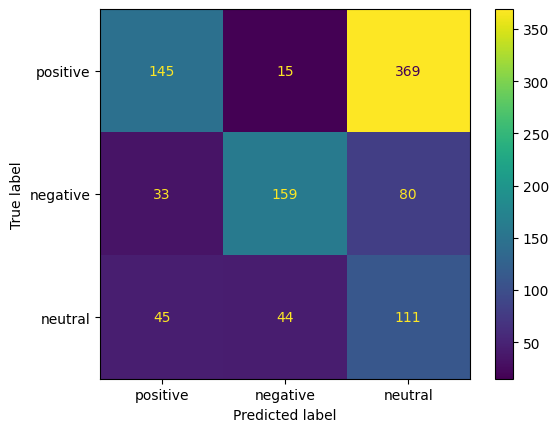

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=["positive","negative" ,"neutral"])
disp.plot()
plt.show()

In [ ]:
def sentiment2(text):
    words = word_tokenize(text)
    votes = []
    pos_polarity = 0
    neg_polarity = 0
    allowed_words = ['a','v','r','n']#adverbs, nouns, adjective, verb
    for word in words:
        if word in words_dict:
            pos_tag, pos, neg = words_dict[word]
            if pos_tag in allowed_words:
                if pos > neg:
                    pos_polarity += pos
                    votes.append(1)
                elif neg > pos:
                    neg_polarity += neg
                    votes.append(0)
    pos_votes = votes.count(1)
    neg_votes = votes.count(0)
    if pos_votes > neg_votes:
        return 'positive'
    elif neg_votes > pos_votes:
        return 'negative'
    else:
        if pos_polarity < neg_polarity:
            return 'negative'
        else:
            return 'positive'



In [ ]:
s2=[]
for i in pt:
  s2.append(sentiment2(i))

In [ ]:
df2['sentiment2']=s2


In [ ]:
df2.head()

,tweets,sentiment,sentiment2
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral,positive
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral,positive
4,राहुल बीजेपी,neutral,positive


In [ ]:
pred_y = []
actual_y = []
pred_y=df2['sentiment2'].tolist()
actual_y=df['Sentiment'].tolist()
print(accuracy_score(actual_y, pred_y) * 100)

67.53246753246754


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_y, pred_y, labels=["positive","negative"])

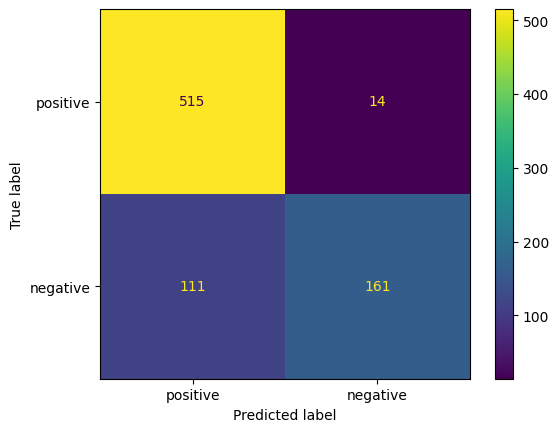

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["positive","negative"])
disp.plot()
plt.show()

In [ ]:
# df3 = pd.concat([df,df2], axis=1)
df3 = pd.concat([df2[['tweets', 'sentiment']],df[['Sentiment']]], axis=1)
# df3.drop(['Tweets', 'sentiment2'])
df4 = df3.rename(columns={"sentiment": "Predicted_Sentiment", "Sentiment": "Actual_Sentiment", "tweets": "Preprocessed_Tweets"})
df4.head(10)

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
0,देश बड़ी बकवास नाउम्मीद निराशा Rafool NakliGan...,negative,negative
1,हा लोगो शौक चढ़ा सिलेंडर रखने बीजेपी सिलेंडर इ...,neutral,positive
2,बात बोल हु आने चुनाव लोगो समझना होगा AAP बस वो...,negative,negative
3,"आरक्षण विरोधी हूं किंतु वोट बीजेपी दूंगा, आरक्...",neutral,negative
4,राहुल बीजेपी,neutral,positive
5,ModiResignOrRepeal बीजेपी मित्रो वक्त देश माफी...,neutral,positive
6,मई पहला प्रश्नपत्रकार कांग्रेस सीट जीत क्यों म...,negative,negative
7,उत्सव सुने बीजेपी कार्यकाल उत्सव नाम जुड़ गाया...,neutral,positive
8,वो चुनावआयोग नेताओं नाचता शेषण चुनाव आयुक्त उस...,neutral,positive
9,अभिव्यक्ति आजादी क्या सिर्फ दलितों दी गई मर्जी...,neutral,positive
